In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
titanic_df = pd.read_csv('data/train.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


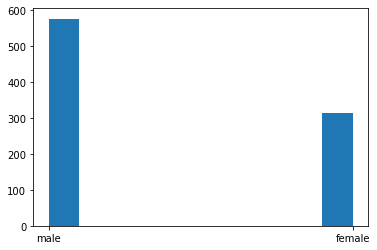

In [8]:
plt.hist(titanic_df["Sex"]);

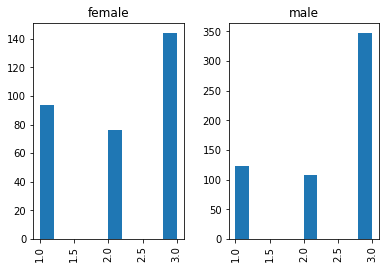

In [65]:
titanic_df["Pclass"].hist(by=titanic_df["Sex"]);

In [59]:
def male_female_child(passenger):
    age,sex = passenger
    
    if age < 16:
        return 'child'
    
    else:
        return sex

In [60]:
titanic_df["person"] = titanic_df[["Age","Sex"]].apply(male_female_child, axis=1)

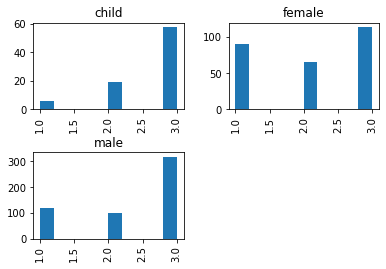

In [64]:
titanic_df["Pclass"].hist(by=titanic_df["person"]);

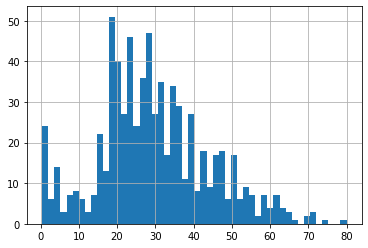

In [68]:
titanic_df["Age"].hist(bins=50);

In [69]:
titanic_df["Age"].mean()

29.69911764705882

In [70]:
titanic_df["person"].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

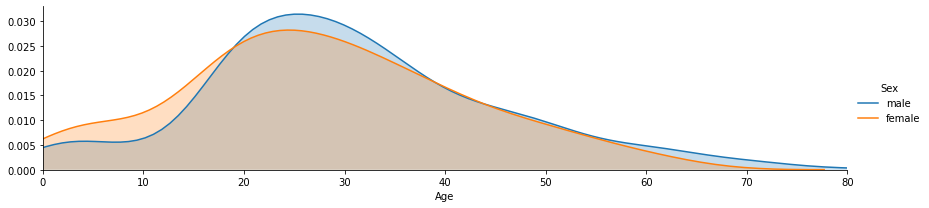

In [71]:
fig = sns.FacetGrid(titanic_df, hue="Sex", aspect=4)

fig.map(sns.kdeplot, 'Age', shade=True)

oldest = titanic_df["Age"].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

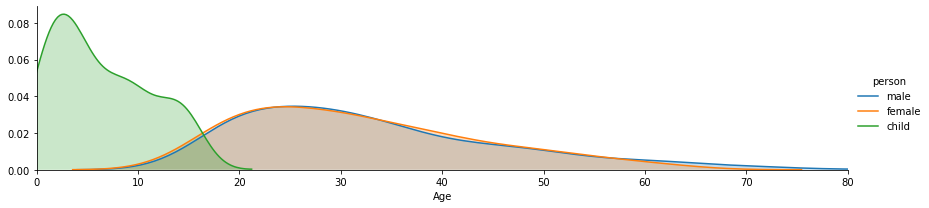

In [72]:
fig = sns.FacetGrid(titanic_df, hue="person", aspect=4)

fig.map(sns.kdeplot, 'Age', shade=True)

oldest = titanic_df["Age"].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

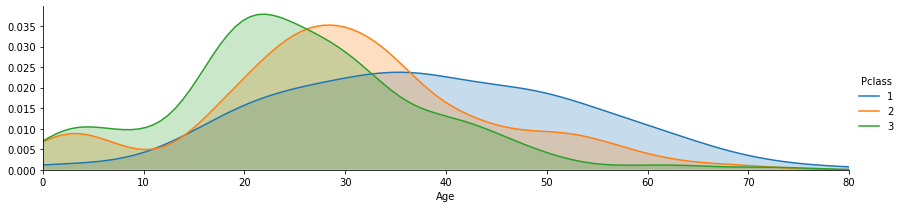

In [73]:
fig = sns.FacetGrid(titanic_df, hue="Pclass", aspect=4)

fig.map(sns.kdeplot, 'Age', shade=True)

oldest = titanic_df["Age"].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

In [74]:
deck = titanic_df['Cabin'].dropna()

In [75]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

In [89]:
levels = [l[0] for l in deck]
levels.sort()

In [90]:
level_df = pd.DataFrame(levels)
level_df.columns = ["Cabin"]

In [92]:
level_df = level_df[level_df["Cabin"] != 'T']

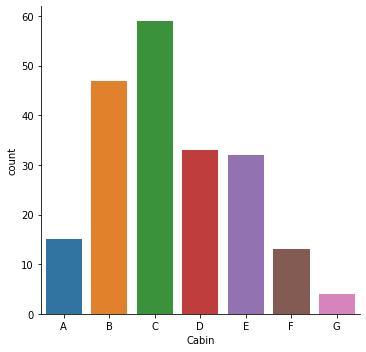

In [93]:
sns.catplot(x='Cabin',data=level_df, kind='count')

In [95]:
titanic_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [94]:
y = titanic_df.pop('Survived')

In [97]:
titanic_df.drop(["Name","Ticket","Cabin"], axis=1, inplace=True)

In [103]:
titanic_df = pd.concat([titanic_df,pd.get_dummies(titanic_df["Embarked"])], axis=1)

In [104]:
titanic_df = pd.concat([titanic_df,pd.get_dummies(titanic_df["person"])], axis=1)

In [131]:
x_df = titanic_df.drop(["Sex","person","Embarked"], axis=1)

In [115]:
x_df.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,C,Q,S,child,female,male
0,1,3,22.0,1,0,7.2500,0,0,1,0,0,1
1,2,1,38.0,1,0,71.2833,1,0,0,0,1,0
2,3,3,26.0,0,0,7.9250,0,0,1,0,1,0
3,4,1,35.0,1,0,53.1000,0,0,1,0,1,0
4,5,3,35.0,0,0,8.0500,0,0,1,0,0,1


In [116]:
x_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Age          714 non-null    float64
 3   SibSp        891 non-null    int64  
 4   Parch        891 non-null    int64  
 5   Fare         891 non-null    float64
 6   C            891 non-null    uint8  
 7   Q            891 non-null    uint8  
 8   S            891 non-null    uint8  
 9   child        891 non-null    uint8  
 10  female       891 non-null    uint8  
 11  male         891 non-null    uint8  
dtypes: float64(2), int64(4), uint8(6)
memory usage: 47.1 KB


In [132]:
x_df["Age"] = x_df["Age"].fillna(round(x_df["Age"].mean()))

In [133]:
x = x_df.values

In [134]:
x.shape

(891, 12)

In [125]:
from sklearn.model_selection import train_test_split

In [135]:
x_train, x_test, y_train, y_test = train_test_split(x,y, stratify=y)

In [153]:
x_train.shape

(668, 12)

In [155]:
x_test.shape

(223, 12)

In [165]:
y_train = np.asarray(y_train)

In [166]:
y_train.shape

(668,)

In [167]:
y_test = np.asarray(y_test)

In [169]:
y_test.reshape(1,-1)

array([[1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
        0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
        1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
        0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
        0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
        0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
        0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
        1, 1, 0]])

In [185]:
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization, 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.backend import clear_session

In [201]:
clear_session()
inputs = Input((12,))
x = BatchNormalization()(inputs)
x = Dense(16, activation='tanh')(x)
x = Dense(32, activation='relu')(x)
# x = Dropout(0.1)(x)
x = Dense(64, activation='relu')(x)
# x = Dropout(0.1)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.1)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.1)(x)
outputs = Dense(1, activation='sigmoid')(x)

model = Model(inputs=inputs, outputs=outputs)
optimizer = Adam(learning_rate=1e-4, decay=1e-5)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [202]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 12)]              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 12)                48        
_________________________________________________________________
dense (Dense)                (None, 16)                208       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_3 (Dense)              (None, 128)               8320      
_________________________________________________________________
dropout (Dropout)            (None, 128)              

In [203]:
history = model.fit(x_train, y_train, batch_size = 32, epochs = 500, validation_data=(x_test, y_test), verbose=1)

Epoch 1/500
21/21 [==============================] - 0s 7ms/step - loss: 0.6956 - accuracy: 0.4835 - val_loss: 0.6794 - val_accuracy: 0.6009
Epoch 2/500
21/21 [==============================] - 0s 3ms/step - loss: 0.6749 - accuracy: 0.6677 - val_loss: 0.6662 - val_accuracy: 0.6413
Epoch 3/500
21/21 [==============================] - 0s 3ms/step - loss: 0.6549 - accuracy: 0.6617 - val_loss: 0.6524 - val_accuracy: 0.6547
Epoch 4/500
21/21 [==============================] - 0s 3ms/step - loss: 0.6370 - accuracy: 0.6707 - val_loss: 0.6363 - val_accuracy: 0.6457
Epoch 5/500
21/21 [==============================] - 0s 3ms/step - loss: 0.6122 - accuracy: 0.6931 - val_loss: 0.6134 - val_accuracy: 0.6682
Epoch 6/500
21/21 [==============================] - 0s 3ms/step - loss: 0.5901 - accuracy: 0.7350 - val_loss: 0.5830 - val_accuracy: 0.7040
Epoch 7/500
21/21 [==============================] - 0s 3ms/step - loss: 0.5615 - accuracy: 0.7485 - val_loss: 0.5492 - val_accuracy: 0.7444
Epoch 8/500
2

Epoch 59/500
21/21 [==============================] - 0s 3ms/step - loss: 0.4092 - accuracy: 0.8114 - val_loss: 0.3671 - val_accuracy: 0.8475
Epoch 60/500
21/21 [==============================] - 0s 3ms/step - loss: 0.4138 - accuracy: 0.8129 - val_loss: 0.3663 - val_accuracy: 0.8430
Epoch 61/500
21/21 [==============================] - 0s 3ms/step - loss: 0.4155 - accuracy: 0.8204 - val_loss: 0.3658 - val_accuracy: 0.8386
Epoch 62/500
21/21 [==============================] - 0s 3ms/step - loss: 0.4275 - accuracy: 0.8263 - val_loss: 0.3668 - val_accuracy: 0.8430
Epoch 63/500
21/21 [==============================] - 0s 3ms/step - loss: 0.4128 - accuracy: 0.8323 - val_loss: 0.3667 - val_accuracy: 0.8430
Epoch 64/500
21/21 [==============================] - 0s 3ms/step - loss: 0.4093 - accuracy: 0.8249 - val_loss: 0.3652 - val_accuracy: 0.8430
Epoch 65/500
21/21 [==============================] - 0s 3ms/step - loss: 0.4073 - accuracy: 0.8263 - val_loss: 0.3650 - val_accuracy: 0.8430
Epoch 

21/21 [==============================] - 0s 3ms/step - loss: 0.3978 - accuracy: 0.8204 - val_loss: 0.3738 - val_accuracy: 0.8430
Epoch 117/500
21/21 [==============================] - 0s 3ms/step - loss: 0.4034 - accuracy: 0.8383 - val_loss: 0.3740 - val_accuracy: 0.8520
Epoch 118/500
21/21 [==============================] - 0s 3ms/step - loss: 0.3887 - accuracy: 0.8428 - val_loss: 0.3729 - val_accuracy: 0.8565
Epoch 119/500
21/21 [==============================] - 0s 3ms/step - loss: 0.3890 - accuracy: 0.8383 - val_loss: 0.3716 - val_accuracy: 0.8565
Epoch 120/500
21/21 [==============================] - 0s 3ms/step - loss: 0.3918 - accuracy: 0.8353 - val_loss: 0.3712 - val_accuracy: 0.8520
Epoch 121/500
21/21 [==============================] - 0s 3ms/step - loss: 0.4025 - accuracy: 0.8323 - val_loss: 0.3720 - val_accuracy: 0.8520
Epoch 122/500
21/21 [==============================] - 0s 3ms/step - loss: 0.3879 - accuracy: 0.8398 - val_loss: 0.3722 - val_accuracy: 0.8430
Epoch 123/500

21/21 [==============================] - 0s 3ms/step - loss: 0.3649 - accuracy: 0.8458 - val_loss: 0.3786 - val_accuracy: 0.8520
Epoch 174/500
21/21 [==============================] - 0s 3ms/step - loss: 0.3845 - accuracy: 0.8308 - val_loss: 0.3779 - val_accuracy: 0.8430
Epoch 175/500
21/21 [==============================] - 0s 3ms/step - loss: 0.3585 - accuracy: 0.8518 - val_loss: 0.3784 - val_accuracy: 0.8430
Epoch 176/500
21/21 [==============================] - 0s 3ms/step - loss: 0.3710 - accuracy: 0.8473 - val_loss: 0.3791 - val_accuracy: 0.8341
Epoch 177/500
21/21 [==============================] - 0s 3ms/step - loss: 0.3607 - accuracy: 0.8563 - val_loss: 0.3783 - val_accuracy: 0.8430
Epoch 178/500
21/21 [==============================] - 0s 3ms/step - loss: 0.3716 - accuracy: 0.8398 - val_loss: 0.3802 - val_accuracy: 0.8475
Epoch 179/500
21/21 [==============================] - 0s 3ms/step - loss: 0.3772 - accuracy: 0.8293 - val_loss: 0.3825 - val_accuracy: 0.8386
Epoch 180/500

21/21 [==============================] - 0s 3ms/step - loss: 0.3629 - accuracy: 0.8473 - val_loss: 0.3881 - val_accuracy: 0.8386
Epoch 231/500
21/21 [==============================] - 0s 3ms/step - loss: 0.3604 - accuracy: 0.8503 - val_loss: 0.3866 - val_accuracy: 0.8386
Epoch 232/500
21/21 [==============================] - 0s 3ms/step - loss: 0.3593 - accuracy: 0.8428 - val_loss: 0.3878 - val_accuracy: 0.8386
Epoch 233/500
21/21 [==============================] - 0s 3ms/step - loss: 0.3677 - accuracy: 0.8548 - val_loss: 0.3888 - val_accuracy: 0.8386
Epoch 234/500
21/21 [==============================] - 0s 2ms/step - loss: 0.3423 - accuracy: 0.8473 - val_loss: 0.3900 - val_accuracy: 0.8386
Epoch 235/500
21/21 [==============================] - 0s 3ms/step - loss: 0.3526 - accuracy: 0.8503 - val_loss: 0.3914 - val_accuracy: 0.8386
Epoch 236/500
21/21 [==============================] - 0s 3ms/step - loss: 0.3408 - accuracy: 0.8668 - val_loss: 0.3912 - val_accuracy: 0.8386
Epoch 237/500

21/21 [==============================] - 0s 3ms/step - loss: 0.3463 - accuracy: 0.8518 - val_loss: 0.3937 - val_accuracy: 0.8206
Epoch 288/500
21/21 [==============================] - 0s 3ms/step - loss: 0.3388 - accuracy: 0.8533 - val_loss: 0.3916 - val_accuracy: 0.8251
Epoch 289/500
21/21 [==============================] - 0s 3ms/step - loss: 0.3330 - accuracy: 0.8593 - val_loss: 0.3914 - val_accuracy: 0.8341
Epoch 290/500
21/21 [==============================] - 0s 3ms/step - loss: 0.3324 - accuracy: 0.8548 - val_loss: 0.3898 - val_accuracy: 0.8386
Epoch 291/500
21/21 [==============================] - 0s 3ms/step - loss: 0.3397 - accuracy: 0.8713 - val_loss: 0.3926 - val_accuracy: 0.8341
Epoch 292/500
21/21 [==============================] - 0s 3ms/step - loss: 0.3441 - accuracy: 0.8503 - val_loss: 0.3941 - val_accuracy: 0.8386
Epoch 293/500
21/21 [==============================] - 0s 3ms/step - loss: 0.3273 - accuracy: 0.8638 - val_loss: 0.3933 - val_accuracy: 0.8386
Epoch 294/500

21/21 [==============================] - 0s 3ms/step - loss: 0.3151 - accuracy: 0.8608 - val_loss: 0.4020 - val_accuracy: 0.8296
Epoch 345/500
21/21 [==============================] - 0s 3ms/step - loss: 0.3256 - accuracy: 0.8638 - val_loss: 0.4046 - val_accuracy: 0.8341
Epoch 346/500
21/21 [==============================] - 0s 3ms/step - loss: 0.3516 - accuracy: 0.8533 - val_loss: 0.4042 - val_accuracy: 0.8206
Epoch 347/500
21/21 [==============================] - 0s 3ms/step - loss: 0.3459 - accuracy: 0.8533 - val_loss: 0.4064 - val_accuracy: 0.8251
Epoch 348/500
21/21 [==============================] - 0s 3ms/step - loss: 0.3279 - accuracy: 0.8623 - val_loss: 0.4044 - val_accuracy: 0.8206
Epoch 349/500
21/21 [==============================] - 0s 3ms/step - loss: 0.3261 - accuracy: 0.8593 - val_loss: 0.4066 - val_accuracy: 0.8251
Epoch 350/500
21/21 [==============================] - 0s 3ms/step - loss: 0.3539 - accuracy: 0.8533 - val_loss: 0.4094 - val_accuracy: 0.8206
Epoch 351/500

21/21 [==============================] - 0s 3ms/step - loss: 0.3227 - accuracy: 0.8653 - val_loss: 0.4108 - val_accuracy: 0.8251
Epoch 402/500
21/21 [==============================] - 0s 3ms/step - loss: 0.3215 - accuracy: 0.8698 - val_loss: 0.4123 - val_accuracy: 0.8341
Epoch 403/500
21/21 [==============================] - 0s 3ms/step - loss: 0.3064 - accuracy: 0.8728 - val_loss: 0.4138 - val_accuracy: 0.8296
Epoch 404/500
21/21 [==============================] - 0s 3ms/step - loss: 0.2951 - accuracy: 0.8728 - val_loss: 0.4163 - val_accuracy: 0.8206
Epoch 405/500
21/21 [==============================] - 0s 3ms/step - loss: 0.3291 - accuracy: 0.8563 - val_loss: 0.4146 - val_accuracy: 0.8251
Epoch 406/500
21/21 [==============================] - 0s 3ms/step - loss: 0.3240 - accuracy: 0.8743 - val_loss: 0.4174 - val_accuracy: 0.8341
Epoch 407/500
21/21 [==============================] - 0s 3ms/step - loss: 0.3231 - accuracy: 0.8743 - val_loss: 0.4164 - val_accuracy: 0.8251
Epoch 408/500

21/21 [==============================] - 0s 2ms/step - loss: 0.3292 - accuracy: 0.8638 - val_loss: 0.4244 - val_accuracy: 0.8251
Epoch 459/500
21/21 [==============================] - 0s 3ms/step - loss: 0.3244 - accuracy: 0.8683 - val_loss: 0.4244 - val_accuracy: 0.8161
Epoch 460/500
21/21 [==============================] - 0s 3ms/step - loss: 0.3164 - accuracy: 0.8668 - val_loss: 0.4247 - val_accuracy: 0.8251
Epoch 461/500
21/21 [==============================] - 0s 3ms/step - loss: 0.3342 - accuracy: 0.8623 - val_loss: 0.4277 - val_accuracy: 0.8296
Epoch 462/500
21/21 [==============================] - 0s 3ms/step - loss: 0.3124 - accuracy: 0.8608 - val_loss: 0.4252 - val_accuracy: 0.8251
Epoch 463/500
21/21 [==============================] - 0s 3ms/step - loss: 0.3216 - accuracy: 0.8608 - val_loss: 0.4229 - val_accuracy: 0.8296
Epoch 464/500
21/21 [==============================] - 0s 2ms/step - loss: 0.3238 - accuracy: 0.8608 - val_loss: 0.4238 - val_accuracy: 0.8341
Epoch 465/500

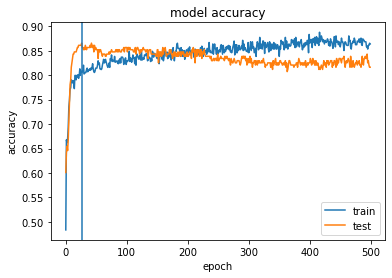

In [210]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.axvline(max_val_accuracy)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show();

In [207]:
max_val_accuracy = np.argsort(history.history['val_accuracy'])[::-1][0]

In [208]:
max_val_accuracy

26